In [30]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Reading and Cleaning

In [31]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5979 sha256=d2992d2987474b289e669b31056a98a80a24cea20b71acefd816318c85a80a20
  Stored in directory: C:\Users\Girish8793\AppData\Local\pip\Cache\wheels\5d\92\bb\474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [32]:
from apyori import apriori

In [42]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [43]:
from mlxtend.frequent_patterns import association_rules

In [2]:
data=pd.read_csv('bread basket.csv')
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
data.shape

(20507, 5)

In [4]:
data.size

102535

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
Transaction        20507 non-null int64
Item               20507 non-null object
date_time          20507 non-null object
period_day         20507 non-null object
weekday_weekend    20507 non-null object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
# Converting the 'date_time' column into the right format
data['date_time']=pd.to_datetime(data['date_time'])

In [7]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [8]:
# Count of unique customers
data.Transaction.nunique()

9465

In [9]:
# Extracting date
data['date']=data['date_time'].dt.date
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')

# Extracting time
data['time']=data['date_time'].dt.time

# Extracting month and replacing it with text
data['month']=data['date_time'].dt.month
data['month']=data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
data['hour']=data['date_time'].dt.hour
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
data['hour']=data['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
data['weekday'] = data['date_time'].dt.weekday
data['weekday'] = data['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))


# dropping date_time column
data.drop('date_time',axis=1,inplace=True)
data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [10]:
# cleaning the item column
data['Item']=data['Item'].str.strip()
data['Item']=data['Item'].str.lower()

In [11]:
# looking 10 rows of data
data.head(10)

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
5,3,cookies,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
6,4,muffin,morning,weekend,2016-10-30,10:08:00,October,10-11,Sunday
7,5,coffee,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday
8,5,pastry,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday
9,5,bread,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday


# Exploratory Data Analysis

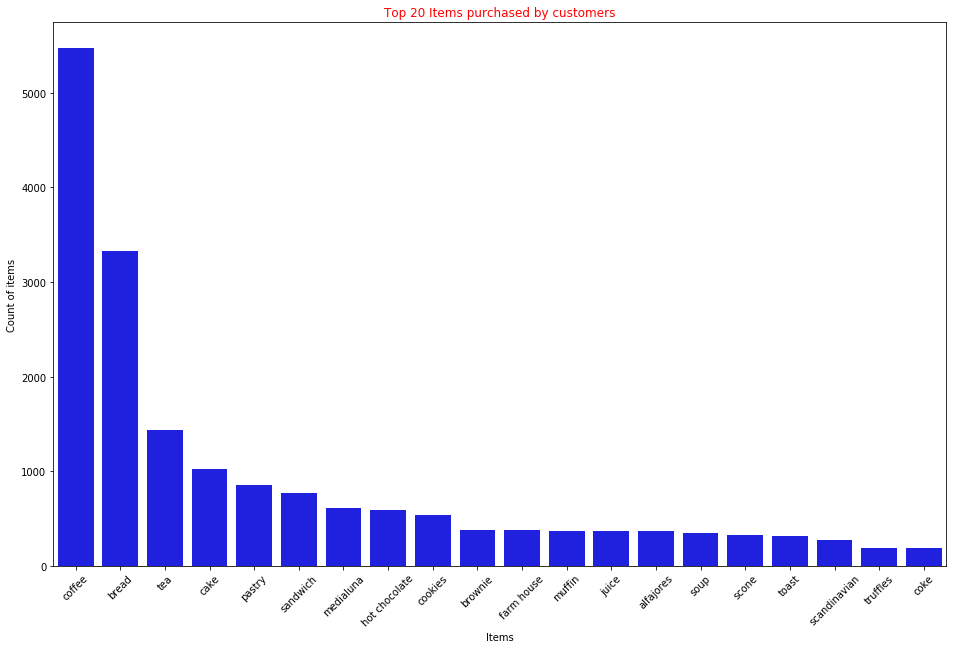

In [12]:
plt.figure(figsize=(16,10))
sns.barplot(x=data.Item.value_counts().head(20).index,y=data.Item.value_counts().head(20).values,color='Blue')
plt.xlabel('Items')
plt.xticks(rotation=45)
plt.ylabel('Count of items')
plt.title('Top 20 Items purchased by customers',color='red')
plt.show()

Observation:
1.Around 48% of transactions contains cofffee, 33% contains bread, 14% contains tea and 10% contains cake.
2.Together coffee and bread 9%, coffee and tea 5%, coffee and cake 5%, bread and tea 3%, bread and cake 2%, tea and cake 2%.

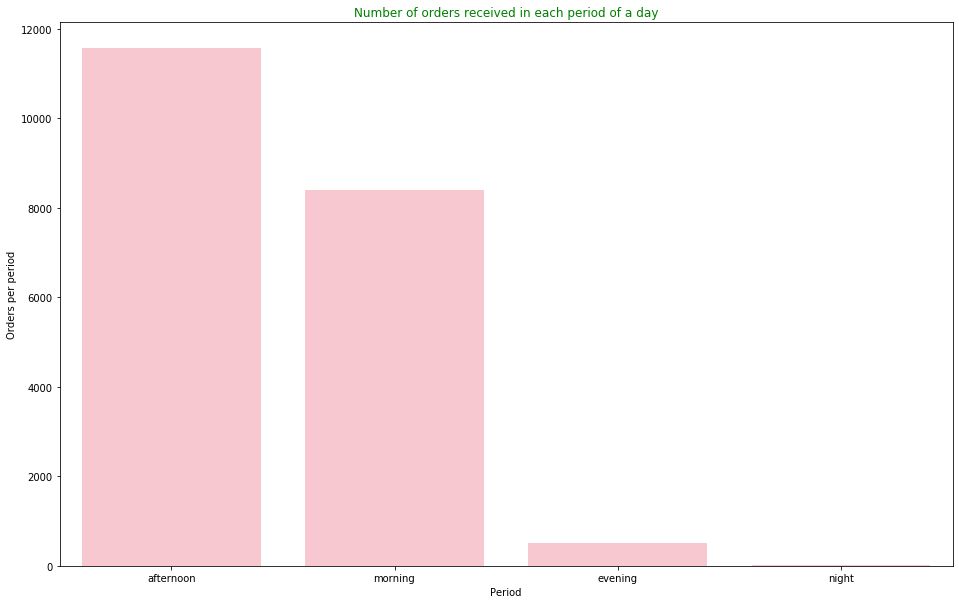

In [13]:
plt.figure(figsize=(16,10))
sns.barplot(x=data.period_day.value_counts().index,y=data.period_day.value_counts().values,color='pink')
plt.xlabel('Period')
plt.ylabel('Orders per period')
plt.title('Number of orders received in each period of a day',color='green')
plt.show()

Observation:
More than 50% of orders came in afternoon i.e. between 12 noon to 5 pm and specifically between 12-2 it was 48%.

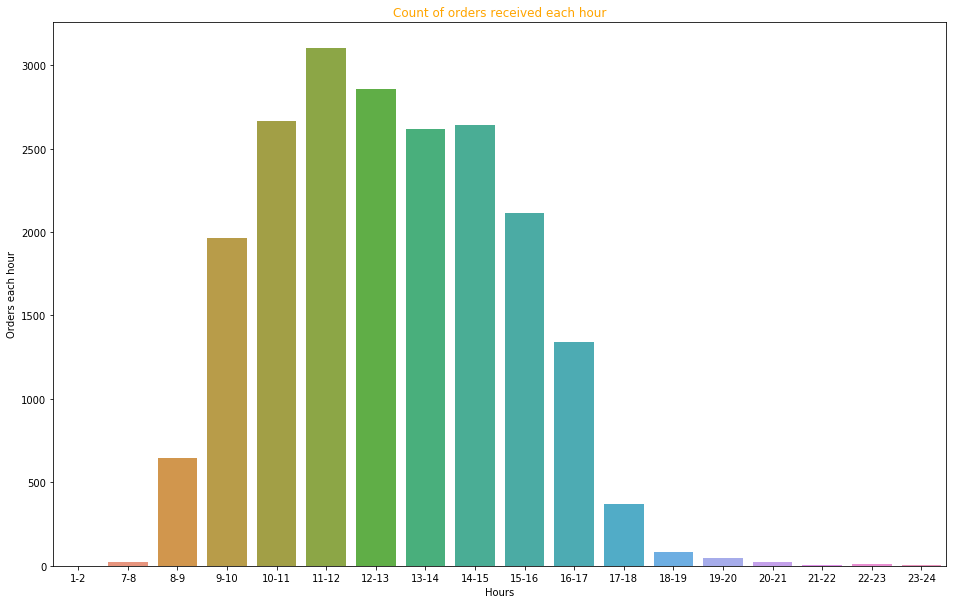

In [14]:
hourTran=data.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,'hourorder']=[1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values('hourorder',inplace=True)

plt.figure(figsize=(16,10))
sns.barplot(data = hourTran, x = "hour", y = "Transaction")
plt.xlabel('Hours')
plt.ylabel('Orders each hour')
plt.title('Count of orders received each hour',color='Orange')
plt.show()

Observation:
Maxium number of orders came in morning 11-12. But from previous graph the percentage of order was maxium in afternoon and we can also see in this figure that between 12-5 the bars are high.

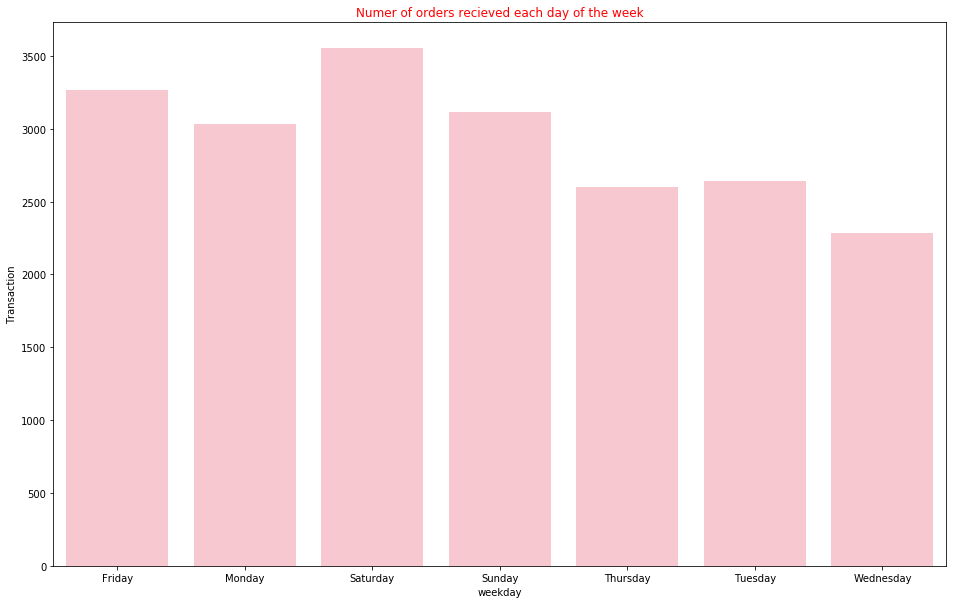

In [15]:
weektrans=data.groupby('weekday')['Transaction'].count().reset_index()
weektrans.loc[:,'weekorder']=[1,2,3,4,5,6,7]
weektrans.sort_values('weekorder',inplace=True)

plt.figure(figsize=(16,10))
plt.xlabel('Weekdays')
plt.ylabel('Orders per weekday')
plt.title('Numer of orders recieved each day of the week',color='red')
sns.barplot(x='weekday',y='Transaction',color='pink',data=weektrans)
plt.show()


Friday, Saturday and Sunday was the days where orders are higher than rest of the days. Together these three days account for 48% of total order received in a week.

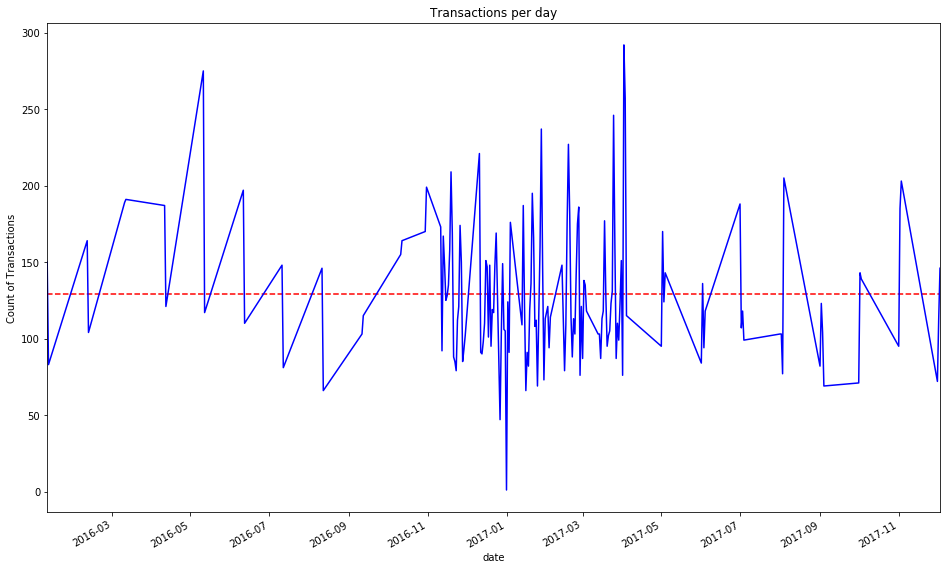

In [16]:
data.groupby('date')['Transaction'].count().plot(kind='line',figsize=(16,10),color='blue')
plt.xlabel('date')
plt.ylabel('Count of Transactions')
plt.hlines(y=129,color='red',linestyles='dashed',xmin=data['date'].min(),xmax=data['date'].max(),label='Mean:129')
plt.title('Transactions per day')
plt.show()

In [17]:
# getting dates where number of transactions are more than 200'
dates=data.groupby('date')['Transaction'].count().reset_index()
dates=dates[dates['Transaction']>200].sort_values('date').reset_index(drop=True)
dates=pd.merge(dates,data[['date','weekday']],on='date',how='inner')
dates.drop_duplicates(inplace=True)
dates



,date,Transaction,weekday
0,2016-05-11,275,Wednesday
275,2016-11-19,209,Saturday
484,2016-12-11,221,Sunday
705,2017-01-28,237,Saturday
942,2017-02-18,227,Saturday
1169,2017-03-25,246,Saturday
1415,2017-04-02,292,Sunday
1707,2017-04-03,257,Monday
1964,2017-08-04,205,Friday
2169,2017-11-03,203,Friday


Obervation:
The mean number of orders per day was around 129. We can see a lot of fluctuation in the data. It is also noted that on 1st Jan'2017 the store was closed as there was no order on that day.
The above table shows days where the number of transactions are more than 200 and it is been observed that 80% of them are weekends.

In [18]:
# grouping the data with respect to transaction and item and look at the count of each item in each transaction

df = data.groupby(['Transaction','Item'])['Item'].count().reset_index(name='Count')
df

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [19]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not

my_basket = df.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
# df.groupby(['Transaction','Item'])['Count'].sum().unstack().reset_index().fillna(0).set_index('Transaction')

my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
frequent_itemsets = apriori(my_basket_sets, min_support = 0.01, use_colnames = True)
frequent_itemsets

<generator object apriori at 0x000001C39886B048>

In [34]:

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head(100)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset

frequent_itemsets = apriori(my_basket_sets, min_support = 0.01, use_colnames = True)
frequent_itemsets

<generator object apriori at 0x000001C3988683C8>

In [78]:
frequent_itemsets = apriori(my_basket_sets, min_support = 0.01, use_colnames = True)
frequent_itemsets

<generator object apriori at 0x000001C398868648>

In [79]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

AttributeError: 'generator' object has no attribute 'columns'

What is Market Basket Analysis?
MARKET Basket Analysis (MBA) is an association analysis and is a popular data mining technique. It’s a kind of knowledge discovery in data (KDD) and this technique can be applied in various fields of work.
In market basket analysis (also called association analysis or frequent itemset mining), you analyze purchases that commonly happen together. For example, people who buy bread and peanut butter also buy jelly. Or people who buy shampoo might also buy conditioner. What relationships there are between items is the target of the analysis. Knowing what your customers tend to buy together can help with marketing efforts and store/website layout.
Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.
The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers. The strategies may include:
Changing the store layout according to trends
Customer behavior analysis
Catalog design
Cross marketing on online stores
What are the trending items customers buy
Customized emails with add-on sales etc.

Apriori Algorithm
Apriori algorithm is given by R. Agrawal and R. Srikant in 1994 for finding frequent itemsets in a dataset for boolean association rule. Name of the algorithm is Apriori because it uses prior knowledge of frequent itemset properties.
Apriori algorithm assumes that any subset of a frequent itemset must be frequent.The value of “frequent itemset” > than a threshold value(i.e. support). Its the algorithm behind Market Basket Analysis.
Apriori assumes that: All subsets of a frequent itemset must be frequent(Apriori propertry).If an itemset is infrequent, all its supersets will be infrequent. Say, a transaction containing {Grapes, Apple, Mango} also contains {Grapes, Mango}. So, according to the principle of Apriori, if {Grapes, Apple, Mango} is frequent, then {Grapes, Mango} must also be frequent.

The analysis of the association rules depend on five measures (but only first three are widely used)</font>
1. `Support`: Support of the item x is nothing but the ratio of the number of transactions in which the item x appears to the total number of transactions. 
    - **Support(Item A) = (Transactions containing Item A) / (Total transactions), range:[0,1]**
2. `Confidence`: Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. A confidence of 0.5 would mean that in 50% of the cases where A were purchased, the purchase also included B. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.
    - **Confidence(A → B) = (Transactions containing both (A and B)) / (Transactions containing A), range:[0,1]**
3. `Lift`: Lift(A → B) refers to the increase in the ratio of sale of B when A is sold. Lift (A → B) is nothing but the ‘interestingness’ or the likelihood of the item B being purchased when the item A is sold. A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.
    - **Lift(A → B) = (Confidence (A → B)) / (Support (B)), range:[0,∞]**